In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load and Preview Data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Convert labels to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print(df['diagnosis'].unique())

[1 0]


In [ ]:
#Preprocess the Data
df.drop
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Train Model
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predictions and Evaluations
Y_pred = clf.predict(X_test)
Y_proba = clf.predict_proba(X_test)[:, 1]

#Calculate Metrics
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.956140350877193
F1 Score: 0.9411764705882353
Precision: 0.9523809523809523
Recall: 0.9302325581395349


In [ ]:
# Classification Report: combines precision, recall, f1-score, and support for each class
print("\nClassification Report:\n", classification_report(Y_test, Y_pred, target_names=['Benign', 'Malignant']))


Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



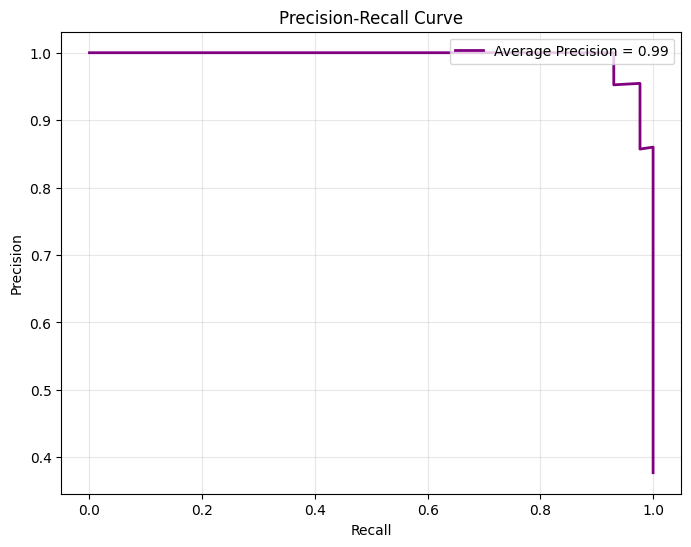

In [ ]:
# Precision-Recall Curve Plot (add this next)
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, Y_proba)
ap_score = average_precision_score(Y_test, Y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

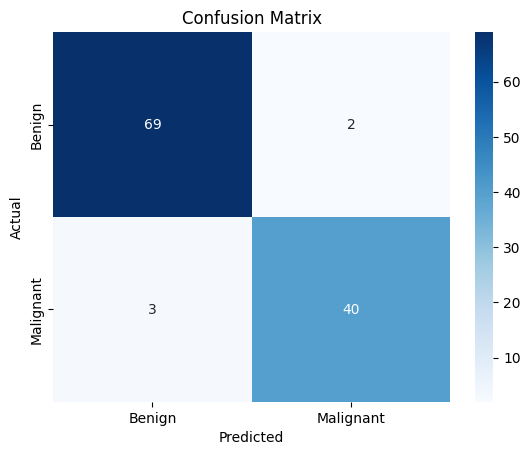

In [ ]:
# Step 10: Visualize confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()